In [8]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import pandas as pd
import os
import numpy as np
from tqdm.notebook import tqdm

In [9]:
train_dir ='images/train'
test_dir = 'images/test'

In [10]:
def dataframe_create(dir):
    image_path =[]
    labels = []
    for label in os.listdir(dir):
        for image_name in os.listdir(os.path.join(dir,label)):
            image_path.append(os.path.join(dir,label,image_name))
            labels.append(label)
        print(label,"completed")
    return image_path,labels

In [11]:
train_data = pd.DataFrame()
train_data['image'],train_data['label'] = dataframe_create(train_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [12]:
test_data = pd.DataFrame()
test_data['image'],test_data['label'] = dataframe_create(test_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [13]:
from tensorflow.keras.preprocessing.image import load_img

In [14]:
def extract_feature(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [15]:
import PIL
print(PIL.__version__)

11.1.0


In [16]:
train_features = extract_feature(train_data['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [17]:
test_features = extract_feature(test_data['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [18]:
x_train = train_features/255.0
x_test = test_features/255.0

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_data['label'])

LabelEncoder()

In [20]:
y_train = le.transform(train_data['label'])
y_test = le.transform(test_data['label'])

In [21]:
y_train = to_categorical(y_train,num_classes= 7)
y_test = to_categorical(y_test,num_classes= 7)

In [23]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [24]:
model = Sequential()

model.add(Conv2D(128,kernel_size = (3,3),activation= 'relu',input_shape = (48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size = (3,3),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size = (3,3),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size = (3,3),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7,activation='softmax'))

c:\Users\Srivathsa\OneDrive\Desktop\Master\personel_projects\facial_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [26]:
model.fit(x_train,y_train,batch_size= 128,epochs = 100, validation_data=(x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 128s 554ms/step - accuracy: 0.2387 - loss: 1.8320 - val_accuracy: 0.2583 - val_loss: 1.8059
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 125s 554ms/step - accuracy: 0.2478 - loss: 1.8059 - val_accuracy: 0.2717 - val_loss: 1.7571
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 125s 553ms/step - accuracy: 0.2871 - loss: 1.7312 - val_accuracy: 0.3610 - val_loss: 1.6112
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 124s 548ms/step - accuracy: 0.3525 - loss: 1.6246 - val_accuracy: 0.4285 - val_loss: 1.4920
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 124s 549ms/step - accuracy: 0.4025 - loss: 1.5221 - val_accuracy: 0.4602 - val_loss: 1.3772
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 124s 548ms/step - accuracy: 0.4407 - loss: 1.4539 - val_accuracy: 0.4922 - val_loss: 1.3114
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 125s 552ms/step - accuracy: 0.4559 - loss: 1.4045 - val_accuracy: 0.5093 - val_loss: 1.2859
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 125s 551ms/step - accuracy: 

In [27]:
model_json = model.to_json()
with open('emotion_detection.json','w') as json_file:
    json_file.write(model_json)
model.save('emotion_detection.h5')

In [28]:
from keras.models  import model_from_json

In [29]:
json_file = open('emotion_detection.json','r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights('emotion_detection.h5')

In [30]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [33]:
def ef(img):
    img = load_img(img,color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

The original Angry image is:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model predicted: angry


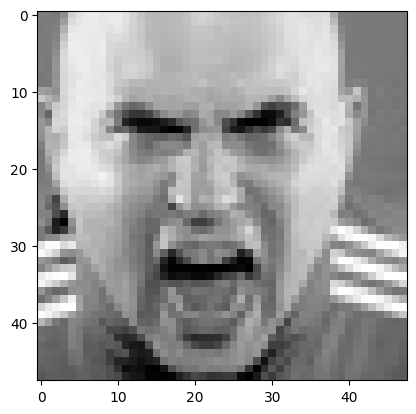

In [38]:

import matplotlib.pyplot as plt
image = 'images/train/angry/22.jpg'
print("The original Angry image is:")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model predicted:",pred_label)
plt.imshow(img.reshape(48,48),cmap='grey')

In [36]:
%pip install matplotlib

  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp311-cp311-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.
